In [1]:
# importing dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Loading crime data set into pandas
crime_data = pd.read_csv("../Resources/crime_data.csv")
crime_data.head()

,year,population,violent crime,violent crime rate,murder and non-negligent manslaughter,murder and non-negligent manslaughter rate,rape,rape rate,robbery,robbery rate,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny-theft,larceny-theft rate,motor vehicle theft,motor vehicle theft rate
0,1994.0,260327021.0,1857670.0,713.6,23326.0,9.0,102216.0,39.3,618949.0,237.8,1113179.0,427.6,12131873.0,4660.2,2712774.0,1042.1,7879812.0,3026.9,1539287.0,591.3
1,1995.0,262803276.0,1798792.0,684.5,21606.0,8.2,97470.0,37.1,580509.0,220.9,1099207.0,418.3,12063935.0,4590.5,2593784.0,987.0,7997710.0,3043.2,1472441.0,560.3
2,1996.0,265228572.0,1688540.0,636.6,19645.0,7.4,96252.0,36.3,535594.0,201.9,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
3,1997.0,267783607.0,1636096.0,611.0,18208.0,6.8,96153.0,35.9,498534.0,186.2,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
4,1998.0,270248003.0,1533887.0,567.6,16974.0,6.3,93144.0,34.5,447186.0,165.5,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9


Text(0, 0.5, 'Violent Crime Rate')

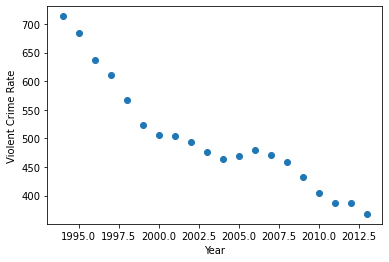

In [12]:
# generating scatter plot of violent crime rate versus year
years = crime_data.iloc[:,0]
violent_crime_rate = crime_data.iloc[:, 3]
plt.scatter(years, violent_crime_rate)
plt.xlabel("Year")
plt.ylabel("Violent Crime Rate")

The r squared value is 0.8928471852172687


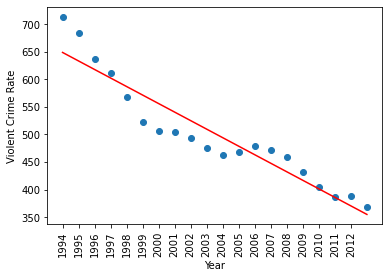

In [19]:
# performing a linear regression on violent crime rate versus year
(vc_slope, vc_intercept, vc_rvalue, vc_pvalue, vc_stderr) = stats.linregress(years, violent_crime_rate)

# creating equation of line to calculate predicted violent crime rate
vc_regress_values = vc_slope*years+vc_intercept

plt.scatter(years, violent_crime_rate)

# plotting the linear model on top of scatter plot 
plt.plot(years, vc_regress_values, "r-")

plt.xlabel("Year")
plt.xticks(np.arange(min(years),max(years),1),rotation=90)
plt.ylabel("Violent Crime Rate")
print(f"The r squared value is {vc_rvalue**2}")
plt.show()

Text(0, 0.5, 'Murder Rate')

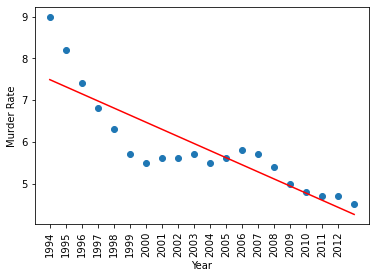

In [18]:
# plotting scatter and linear model for murder rate versus year
murder_rate = crime_data.iloc[:,5]
(m_slope, m_intercept, m_rvalue, m_pvalue, m_stderr) = stats.linregress(years, murder_rate)
m_regress_values = m_slope*years+m_intercept

plt.scatter(years, murder_rate)
plt.plot(years, m_regress_values, "r-")

plt.xlabel("Year")
plt.xticks(np.arange(min(years),max(years),1),rotation=90)
plt.ylabel("Murder Rate")

Text(0, 0.5, 'Aggravated Assault Rate')

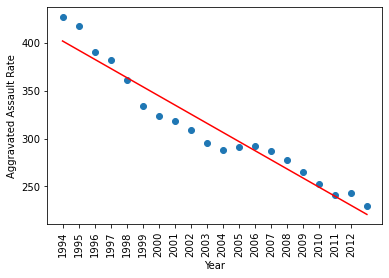

In [46]:
# plotting scatter and linear model for aggravated assault rate versus year
agg_assault = crime_data.iloc[:,11]
(aa_slope, aa_intercept, aa_rvalue, aa_pvalue, aa_stderr) = stats.linregress(years, agg_assault)
aa_regress_values = aa_slope*years+aa_intercept

plt.scatter(years, agg_assault)
plt.plot(years, aa_regress_values, "r-")
plt.xlabel("Year")
plt.xticks(np.arange(min(years),max(years),1),rotation=90)
plt.ylabel("Aggravated Assault Rate")

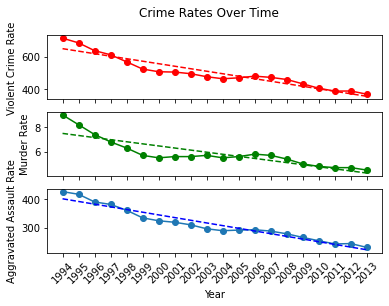

In [54]:
# generating a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time")

ax1.plot(years, violent_crime_rate, marker="o", color="red")
ax1.plot(years, vc_regress_values, "r--")
ax1.set_ylabel("Violent Crime Rate")


ax2.plot(years, murder_rate, marker="o", color="green")
ax2.plot(years, m_regress_values, "g--")
ax2.set_ylabel("Murder Rate")

ax3.plot(years, agg_assault, marker="o")
ax3.plot(years, aa_regress_values, "b--")
ax3.set_ylabel("Aggravated Assault Rate")
ax3.set_xlabel("Year")
ax3.set_xticks(np.arange(min(years), max(years)+1, 1))
ax3.set_xticklabels(years.astype(int), rotation=45)
plt.show()

In [57]:
# Calculate the crime rates for 2019
year = 2019
exp_violent = vc_slope*year+vc_intercept
exp_murder = m_slope*year+m_intercept
exp_agg_assault = aa_slope*year+aa_intercept
print("The expected crime rate in 2019 would be: ")
print(f"Violent crimes rate: {round(exp_violent,2)}%")
print(f"Murder rate: {round(exp_murder,2)}%")
print(f"Aggravated assault rate: {round(exp_agg_assault,2)}%")

The expected crime rate in 2019 would be: 
Violent crimes rate: 262.21%
Murder rate: 3.24%
Aggravated assault rate: 163.37%
